In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

In [2]:
def generate_data(N, f=np.cos, x0=0, x1=3*np.pi):
    """This function generates some noisy data (the function f evaluated
    at N points in the interval [x0, x1) with some gaussian noise)"""

    x = x0 + np.random.rand(N)* 3 * np.pi
    y = f(x) + np.random.randn(N) * 1e-1
    return x.reshape(N, 1), y.reshape(N, 1)

In [3]:
# setup training data
x, y = generate_data(30)

In [4]:
#--- setup GPR ---
kernel = 1.0 * RBF(length_scale=1) + WhiteKernel(noise_level=1)

gaussian_process = GaussianProcessRegressor(kernel=kernel).fit(x, y)
#---

In [5]:
#--- predict ---
t = np.linspace(0, 3 * np.pi, 500)
y_predicted_mean, y_predicted_cov = gaussian_process.predict(
    t[:, np.newaxis], 
    return_cov=True
)
#---

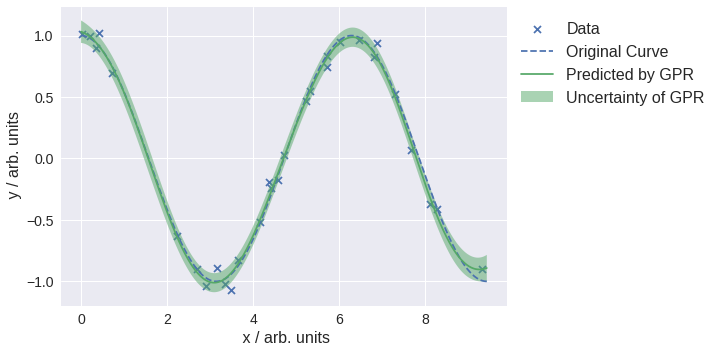

In [9]:
#--- plot results ---
# input
plt.scatter(x.flatten(), y.flatten(), marker="x", label="Data")
plt.plot(t, np.cos(t), "--", label="Original Curve")

# result of GPR
plt.plot(t, y_predicted_mean, label="Predicted by GPR")
plt.fill_between(
    t, 
    y_predicted_mean.flatten() - np.sqrt(np.diag(y_predicted_cov)),
    y_predicted_mean.flatten() + np.sqrt(np.diag(y_predicted_cov)),
    alpha=0.5,
    label="Uncertainty of GPR"
)

plt.xlabel(" x / arb. units", fontsize=16)
plt.ylabel(" y / arb. units", fontsize=16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(fontsize=16, bbox_to_anchor=(1.0, 1.0))
#---